## Procesar imágenes de drones

Este repositorio se creó con la intención de facilitar el procesamiento de imágenes de drones, con la intención de crear fácilmente índices vegetales y mapas de coberturas, a partir de bandas espectrales tomadas por drones.
A continuación se muestra un ejemplo de su uso y de algunas funciones disponibles hasta el momento.

Lo primero es señalar la carpeta en donde se encuentran ubicadas las imágenes de drones.
De  igual forma, se debe indicar el bnombre de las bandas a leer. *Actualmente, solo se puede leer una imágen for fecha.*

La función drone_data.DroneData, almacena la información en una matriz de tres dimensiones, x * y * banda.

In [1]:
from utils import drone_data
from utils import plt_functions
import numpy as np

m = drone_data.DroneData("images/", ## directorio donde se encuentran las imágenes
                         bands=['blue', 'green', 'red', 'r_edge', 'nir'] ## nombre de las bandas de las imagenes
                         )


### Añadir indices vegetales

Con la función *.calculate_vi*, se pueden realizar distintas operaciones entre bandas, como defecto se encuentra las bandas ndvi y ndvire.
``
<br>
$$ndvi = \frac{nir - red}{red + nir}$$
<br>
$$ndvire = \frac{nir - rededge}{rededge + nir}$$

También es posible agregar otros tipo de indices vegetales, expresando la función, ejemplo: "(nir-green)/(nir + green)"

In [2]:
### Calculando indices vegetales
m.calculate_vi('ndvi')
m.calculate_vi('ndvire')

La función *plotsingleband()*, permite mostrar una banda almacenada en el cubo de datos.

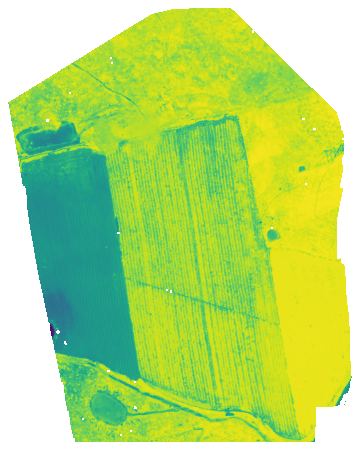

In [3]:
m.plot_singleband('ndvi')

De igual forma se cuenta con la función *plot_multiplebands* para poder crear mapas combinando distintas bandas.

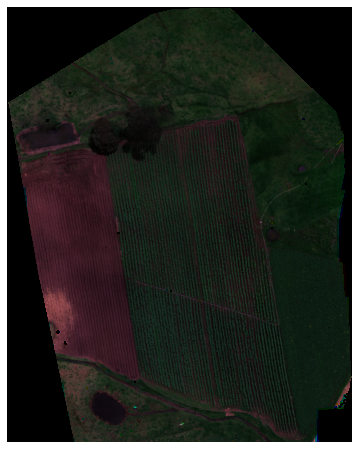

In [4]:
m.plot_multiplebands(['red', 'green', 'blue'])

### Clasificación no supervisada por K-means

Una técnica de exploración de datos, para evaluar cuantos tipos de cobertura hay agrupadas en la imagen, es considerando una clasificación no supervisada.
Con la función *clusters*, el usuario puede agrupar la información en un cierto número de clusters, empleando las bandas disponibles.
Esta clasificación contempla tres pasos
* Escalar los datos, empleando min max.
* Hacer una reducción de dimensiones, con componentes principales (PCA)
* Entrenar el modelo de k-means con todos los datos, o con un porcentaje.

In [ ]:
m.clusters(nclusters=14, ## número de grupos
           p_sample=20, ## porcentaje de datos a usar
           pcavariance=0.05 ## cuanto porcentaje de varianza se utilizará para la reducción por PCA
)

Para mostrar una gráfica con los clusters generados, se emplea la función: *plt_functions.plot_categoricalraster* esta no permite visualizar imágenes con datos categoricos

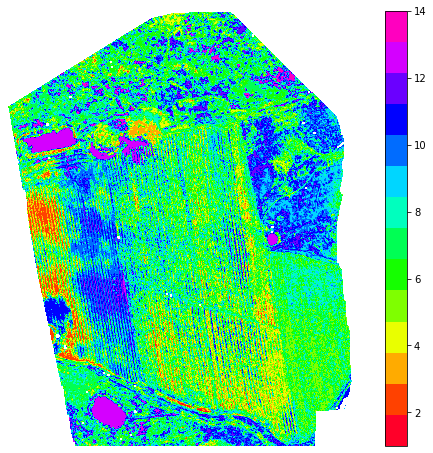

In [6]:
plt_functions.plot_categoricalraster(m.drone_data.clusters.data, nodata=-10000)


### Clasificación supervisada con Random Forest
Este módulo se diseñó para aplicar un modelo previamente entrenado de random forest a la imagen actual. esto aún está en fase de evaluación.
Para su uso es necesario contar con un modelo de clasificación y con las imágenes de la región, a diferenciar entre un cultivo especifico y otro.

In [7]:
import pickle
filename = 'ml_models/rf_model.sav'
model = pickle.load(open(filename, 'rb'))

una vez con el modelo, se pasa a emplear la función *rm_classification*,
este creará una capa con la clasificación del modelo entrenado, empleando la información disponible. Dependiendo del tamaño de la imágen, este proceso tomará un par de minutos.

In [8]:
m.rf_classification(model)


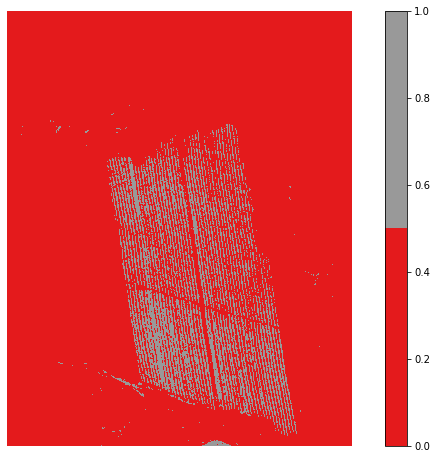

In [10]:
# para visualizar los datos
plt_functions.plot_categoricalraster(m.drone_data.rf_classification.data,
                                     'Set1')


### Exportar y cargar imágenes individuales
Se puede exportar a formato GeoTif bandas individuales, que ya se encuentren almacenadas dentro del cubo de datos.
Señalando el archivo de salida, y cuales son las bandas que desea exportar.

In [12]:
# para saber cuales son los nombres de las bandas disponibles
print(m.variable_names)

['blue', 'green', 'red', 'r_edge', 'nir', 'ndvi', 'ndvire', 'clusters', 'rf_classification']


In [13]:
m.to_tiff("outputs/bandadron",varnames= ['clusters', 'rf_classification'])

Así mismo se puede cargar imágenes individuales al cubo de datos, que contengan de la misma región, esto diseñado para evitar el paso de la clasificación no supervisada y supervisada, cuando ya se cuenta con los datos exportados.

In [5]:
m.add_layer("outputs/bandadron_clusters.tif", ## directorio de la imágen a cargar
            "clusters" ## nombre de la variable
            )

